# Medical Embeddings and clinical trial search engine

In [1]:
#  Importing Libraries
import streamlit as st  # importing streamlit liabrary
import pandas as pd
import numpy as np
import gensim
from gensim.models import Word2Vec
from gensim.models import FastText
from sklearn.decomposition import PCA
from matplotlib import pyplot

/home/c0d3b23ak32/anaconda3/envs/tensorflow/lib/python3.6/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
import matplotlib.pyplot as plt # our main display package
import plotly.graph_objects as go
import string # used for preprocessing
import re # used for preprocessing
import numpy as np # used for managing NaNs
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords # used for preprocessing
from nltk.stem import WordNetLemmatizer # used for preprocessing
from sklearn.model_selection import train_test_split
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/c0d3b23ak32/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/c0d3b23ak32/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/c0d3b23ak32/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Importing datasets 

In [3]:
df=pd.read_csv('input/Dimension-covid.csv')   #for preprocessing
df1=pd.read_csv('input/Dimension-covid.csv')  #for returning results

# Preprocessing data 

In [4]:
# understand the data

df.shape

(10666, 21)

In [5]:
# understand the data

df.head()

,Date added,Trial ID,Title,Brief title,Acronym,Abstract,Publication date,Active years,Phase,Conditions,...,Gender,Registry,Investigators/Contacts,Sponsors/Collaborators,GRID IDs,Country of Sponsor/Collaborator,Collaborating Funders,Funder Country,Source Linkout,Dimensions URL
0,2021-06-04,NCT04912934,The Relationship Between Coronavirus Anxiety L...,The Relationship Between COVID-19 Anxiety Leve...,COVID-19,The aim was to determine the coronavirus anxie...,2020-06-20,2020,NaN,COVID-19; Emotional Eating; Metabolic Syndrome,...,All,ClinicalTrials.gov,Dilek Küçük Alemdar,Ordu University,grid.412366.4,Turkey,NaN,NaN,https://clinicaltrials.gov/show/NCT04912934,https://app.dimensions.ai/details/clinical_tri...
1,2021-06-04,NCT04912921,Effect of Palmitoylethanolamide on Proinflamma...,Effect of Palmitoylethanolamide on Proinflamma...,NaN,This is a randomized controlled trial to exami...,2020-10-20,2020; 2021; 2022,NaN,COVID19; Inflammation,...,All,ClinicalTrials.gov,NaN,Arizona State University,grid.215654.1,United States,NaN,NaN,https://clinicaltrials.gov/show/NCT04912921,https://app.dimensions.ai/details/clinical_tri...
2,2021-06-04,NCT04912895,Detection of SARS-CoV-2 RNA and Biomarkers in ...,Detection of SARS-CoV-2 RNA in Coughed Droplet...,NaN,The purpose of this study is to learn how to b...,2021-04-14,2021; 2022,NaN,Covid19,...,All,ClinicalTrials.gov,Larry Anderson,Emory University Hospital Midtown; Emory Unive...,grid.411929.6; grid.412162.2; grid.189967.8; g...,United States; United States; United States; U...,NaN,NaN,https://clinicaltrials.gov/show/NCT04912895,https://app.dimensions.ai/details/clinical_tri...
3,2021-06-04,NCT04912817,Pain Rehabilitation Virtual Reality (PR-VR) At...,PR-VR At-home Program During and After COVID-19,NaN,Poorly controlled chronic pain in teens can im...,2021-09-01,2021; 2022,NaN,"Pain, Chronic",...,All,ClinicalTrials.gov,Jennifer Stinson,Hospital for Sick Children; Stanford University,grid.42327.30; grid.168010.e,Canada; United States,Hospital for Sick Children,Canada,https://clinicaltrials.gov/show/NCT04912817,https://app.dimensions.ai/details/clinical_tri...
4,2021-06-04,NCT04912804,Perceived Health After Hospitalization for COV...,Perceived Health After Hospitalization for COV...,PRO-COVID,There are currently no precise data available ...,2020-06-30,2020; 2021,NaN,"COVID-19, Post-hospitalization, Disease Impact",...,All,ClinicalTrials.gov,NaN,Centre Hospitalier Universitaire Dijon Bourgogne,grid.31151.37,France,NaN,NaN,https://clinicaltrials.gov/show/NCT04912804,https://app.dimensions.ai/details/clinical_tri...


In [7]:
# Preview the  abstract in the first row  
df['Abstract'][1]

'This is a randomized controlled trial to examine the effect of a food supplement on proinflammatory cytokines and biomarkers in an adult population recently diagnosed with COVID-19 who are asymptomatic or experiencing only mild symptoms. The supplement, palmitoylethanolamide (PEA), is marketed under the trademarked product with increased bioavailability and format versatility: Levagen+™ (Gencor Pacific Limited, Irvine, CA).\n\nDetailed Description\nInflammation is at the core of many chronic conditions and exacerbates infectious conditions, and inflammatory responses appear to be key determinants of the severity of COVID-19 infection. Hence, controlling inflammation is considered a key strategy for slowing the progression of disease and tissue pathology. This research offers a natural, dietary approach to managing inflammation by reducing the mediators of inflammation. The beneficial effects of palmitoylethanolamide (PEA) for reducing inflammation is documented in the research literat

From the above we can see that we have uppercase,stop words, numbers, symbols, puntuations and  \n spaces.
In order for the word2vec or any nlp process can take precedence we must preprocess the data by eliminating all the above and vect

In [9]:
# function to remove all urls
def remove_urls(text):    
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

# make all text lowercase
def text_lowercase(text):
    return text.lower()

# remove numbers
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result

# remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# tokenize
def tokenize(text):
    text = word_tokenize(text)
    return text

# remove stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

# lemmatize Words 
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

#Creating one function so that all functions can be applied at once
def preprocessing(text):
    
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_numbers(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

In [10]:
#Applying preprocessing and removing '\n' character

for i in range(df.shape[0]):
    df['Abstract'][i]=preprocessing(str(df['Abstract'][i])) 
for text in df.Abstract:

    text=text.replace('\n',' ')    

In [11]:
df.head()

,Date added,Trial ID,Title,Brief title,Acronym,Abstract,Publication date,Active years,Phase,Conditions,...,Gender,Registry,Investigators/Contacts,Sponsors/Collaborators,GRID IDs,Country of Sponsor/Collaborator,Collaborating Funders,Funder Country,Source Linkout,Dimensions URL
0,2021-06-04,NCT04912934,The Relationship Between Coronavirus Anxiety L...,The Relationship Between COVID-19 Anxiety Leve...,COVID-19,aim determine coronavirus anxiety level emotio...,2020-06-20,2020,NaN,COVID-19; Emotional Eating; Metabolic Syndrome,...,All,ClinicalTrials.gov,Dilek Küçük Alemdar,Ordu University,grid.412366.4,Turkey,NaN,NaN,https://clinicaltrials.gov/show/NCT04912934,https://app.dimensions.ai/details/clinical_tri...
1,2021-06-04,NCT04912921,Effect of Palmitoylethanolamide on Proinflamma...,Effect of Palmitoylethanolamide on Proinflamma...,NaN,randomized controlled trial examine effect foo...,2020-10-20,2020; 2021; 2022,NaN,COVID19; Inflammation,...,All,ClinicalTrials.gov,NaN,Arizona State University,grid.215654.1,United States,NaN,NaN,https://clinicaltrials.gov/show/NCT04912921,https://app.dimensions.ai/details/clinical_tri...
2,2021-06-04,NCT04912895,Detection of SARS-CoV-2 RNA and Biomarkers in ...,Detection of SARS-CoV-2 RNA in Coughed Droplet...,NaN,purpose study learn better detect infection un...,2021-04-14,2021; 2022,NaN,Covid19,...,All,ClinicalTrials.gov,Larry Anderson,Emory University Hospital Midtown; Emory Unive...,grid.411929.6; grid.412162.2; grid.189967.8; g...,United States; United States; United States; U...,NaN,NaN,https://clinicaltrials.gov/show/NCT04912895,https://app.dimensions.ai/details/clinical_tri...
3,2021-06-04,NCT04912817,Pain Rehabilitation Virtual Reality (PR-VR) At...,PR-VR At-home Program During and After COVID-19,NaN,poorly controlled chronic pain teen impact qua...,2021-09-01,2021; 2022,NaN,"Pain, Chronic",...,All,ClinicalTrials.gov,Jennifer Stinson,Hospital for Sick Children; Stanford University,grid.42327.30; grid.168010.e,Canada; United States,Hospital for Sick Children,Canada,https://clinicaltrials.gov/show/NCT04912817,https://app.dimensions.ai/details/clinical_tri...
4,2021-06-04,NCT04912804,Perceived Health After Hospitalization for COV...,Perceived Health After Hospitalization for COV...,PRO-COVID,currently precise data available impact covid ...,2020-06-30,2020; 2021,NaN,"COVID-19, Post-hospitalization, Disease Impact",...,All,ClinicalTrials.gov,NaN,Centre Hospitalier Universitaire Dijon Bourgogne,grid.31151.37,France,NaN,NaN,https://clinicaltrials.gov/show/NCT04912804,https://app.dimensions.ai/details/clinical_tri...


In [12]:
df['Abstract'][0]

'aim determine coronavirus anxiety level emotional eating status case diagnosis mets according diagnostic criterion published international diabetic federation idf healthy individual similar bmi mets subject detailed description aim determine coronavirus anxiety level emotional eating status case diagnosis mets according diagnostic criterion published international diabetic federation idf healthy individual similar bmi mets subject study completed descriptive cross sectional relational screening model full sampling method used study study completed individual metabolic syndrome attending diet clinic healthy individual without mets diagnosis also attending diet clinic collection data used anthropometric measurement biochemical finding blood pressure survey form coronavirus anxiety scale ca emotional eating scale ee'

In [13]:
#Applying preprocessing and removing '\n' character

for i in range(df.shape[0]):
    df['Title'][i]=preprocessing(str(df['Title'][i])) 
for text in df.Title:

    text=text.replace('\n',' ') 

In [14]:
x=[word_tokenize(word) for word in df.Abstract ]   #Tokenizing data for training purpose

# Exploratory data analysis

In [15]:
from collections import Counter
cnt = Counter()
for text in df["Abstract"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)  #top 10 common words

[('patient', 38457),
 ('covid', 38211),
 ('study', 31963),
 ('group', 12771),
 ('treatment', 12471),
 ('day', 12337),
 ('sars', 11600),
 ('cov', 11535),
 ('clinical', 11507),
 ('disease', 11395)]

explain the above EDA 

In [16]:
!pip install wordcloud

     |████████████████████████████████| 435 kB 4.3 MB/s eta 0:00:01


We can do the above with a wordcloud that uses the freqeuncy and colors of words in a pciture format to understand the corpus 

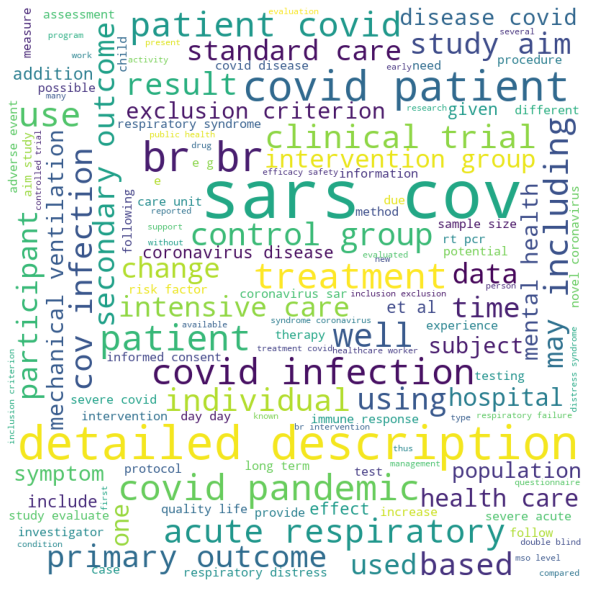

In [18]:
#Final word cloud after all the cleaning and pre-processing
from wordcloud import WordCloud
from textwrap import wrap
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
#comment_words = ' '
stopwords = set(STOPWORDS) 
from pandas.core.common import flatten

# iterate through the csv file 


comment_words=flatten(x)
comment_words=' '.join(comment_words)


wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

# Training skipgram model


In [19]:
# training the model
skipgram = Word2Vec(x, vector_size =50, window = 3, min_count=2,sg = 1)
print(skipgram)
skipgram.save('skipgramx1.bin')

2023-01-05 23:59:46.894 INFO    gensim.models.word2vec: collecting all words and their counts
2023-01-05 23:59:46.896 INFO    gensim.models.word2vec: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-01-05 23:59:47.177 INFO    gensim.models.word2vec: PROGRESS: at sentence #10000, processed 2024809 words, keeping 39392 word types
2023-01-05 23:59:47.185 INFO    gensim.models.word2vec: collected 39969 word types from a corpus of 2088009 raw words and 10666 sentences
2023-01-05 23:59:47.186 INFO    gensim.models.word2vec: Creating a fresh vocabulary
2023-01-05 23:59:47.263 INFO    gensim.utils: Word2Vec lifecycle event {'msg': 'effective_min_count=2 retains 24877 unique words (62.2407365708424%% of original 39969, drops 15092)', 'datetime': '2023-01-05T23:59:47.263160', 'gensim': '4.0.1', 'python': '3.6.13 |Anaconda, Inc.| (default, Jun  4 2021, 14:25:59) \n[GCC 7.5.0]', 'platform': 'Linux-5.15.0-57-generic-x86_64-with-debian-bookworm-sid', 'event': 'prepare_vocab'}
2

Word2Vec(vocab=24877, vector_size=50, alpha=0.025)


In [20]:
# training the model

skipgram = Word2Vec(x, vector_size =100, window = 1, min_count=2,sg = 1)
print(skipgram)
skipgram.save('skipgramx11.bin')


2023-01-06 00:01:08.546 INFO    gensim.utils: Word2Vec lifecycle event {'fname_or_handle': 'skipgramx1.bin', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2023-01-06T00:01:08.546813', 'gensim': '4.0.1', 'python': '3.6.13 |Anaconda, Inc.| (default, Jun  4 2021, 14:25:59) \n[GCC 7.5.0]', 'platform': 'Linux-5.15.0-57-generic-x86_64-with-debian-bookworm-sid', 'event': 'saving'}
2023-01-06 00:01:08.548 INFO    gensim.utils: not storing attribute cum_table
2023-01-06 00:01:08.582 INFO    gensim.utils: saved skipgramx1.bin
2023-01-06 00:01:08.583 INFO    gensim.models.word2vec: collecting all words and their counts
2023-01-06 00:01:08.584 INFO    gensim.models.word2vec: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-01-06 00:01:08.806 INFO    gensim.models.word2vec: PROGRESS: at sentence #10000, processed 2024809 words, keeping 39392 word types
2023-01-06 00:01:08.813 INFO    gensim.models.word2vec: collected 39969 word types from a c

Word2Vec(vocab=24877, vector_size=100, alpha=0.025)


In [21]:
# Loading the model

skipgram = Word2Vec.load('skipgramx11.bin')

2023-01-06 00:02:13.287 INFO    gensim.utils: loading Word2Vec object from skipgramx11.bin
2023-01-06 00:02:13.308 INFO    gensim.utils: loading wv recursively from skipgramx11.bin.wv.* with mmap=None
2023-01-06 00:02:13.309 INFO    gensim.utils: setting ignored attribute cum_table to None
2023-01-06 00:02:13.531 INFO    gensim.utils: Word2Vec lifecycle event {'fname': 'skipgramx11.bin', 'datetime': '2023-01-06T00:02:13.531681', 'gensim': '4.0.1', 'python': '3.6.13 |Anaconda, Inc.| (default, Jun  4 2021, 14:25:59) \n[GCC 7.5.0]', 'platform': 'Linux-5.15.0-57-generic-x86_64-with-debian-bookworm-sid', 'event': 'loaded'}



# Training Fasttext model

In [22]:
fast_n= FastText(x,vector_size=200, 
                 window=3, min_count=2,
                 workers=5, min_n=1,max_n=2,sg=1)  #training fasttext Model, with skipgram
fast_n=fast_n.save('fast_p.bin')    #Saving our model

fast_n = Word2Vec.load('fast_p.bin')  #Loading our pretrained model


2023-01-06 00:04:28.854 INFO    gensim.models.word2vec: collecting all words and their counts
2023-01-06 00:04:28.855 INFO    gensim.models.word2vec: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-01-06 00:04:29.054 INFO    gensim.models.word2vec: PROGRESS: at sentence #10000, processed 2024809 words, keeping 39392 word types
2023-01-06 00:04:29.060 INFO    gensim.models.word2vec: collected 39969 word types from a corpus of 2088009 raw words and 10666 sentences
2023-01-06 00:04:29.061 INFO    gensim.models.word2vec: Creating a fresh vocabulary
2023-01-06 00:04:29.147 INFO    gensim.utils: FastText lifecycle event {'msg': 'effective_min_count=2 retains 24877 unique words (62.2407365708424%% of original 39969, drops 15092)', 'datetime': '2023-01-06T00:04:29.147072', 'gensim': '4.0.1', 'python': '3.6.13 |Anaconda, Inc.| (default, Jun  4 2021, 14:25:59) \n[GCC 7.5.0]', 'platform': 'Linux-5.15.0-57-generic-x86_64-with-debian-bookworm-sid', 'event': 'prepare_vocab'}
2

In [23]:
FastText=FastText(x,vector_size=100, 
                  window=2, min_count=2,
                  workers=5, min_n=1, max_n=2,sg=1)
                  
FastText.save('FastText.bin')    #Saving our model
FastText = Word2Vec.load('FastText.bin')  #Loading our pretrained model

2023-01-06 00:05:47.740 INFO    gensim.models.word2vec: collecting all words and their counts
2023-01-06 00:05:47.741 INFO    gensim.models.word2vec: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-01-06 00:05:47.944 INFO    gensim.models.word2vec: PROGRESS: at sentence #10000, processed 2024809 words, keeping 39392 word types
2023-01-06 00:05:47.950 INFO    gensim.models.word2vec: collected 39969 word types from a corpus of 2088009 raw words and 10666 sentences
2023-01-06 00:05:47.950 INFO    gensim.models.word2vec: Creating a fresh vocabulary
2023-01-06 00:05:48.030 INFO    gensim.utils: FastText lifecycle event {'msg': 'effective_min_count=2 retains 24877 unique words (62.2407365708424%% of original 39969, drops 15092)', 'datetime': '2023-01-06T00:05:48.030709', 'gensim': '4.0.1', 'python': '3.6.13 |Anaconda, Inc.| (default, Jun  4 2021, 14:25:59) \n[GCC 7.5.0]', 'platform': 'Linux-5.15.0-57-generic-x86_64-with-debian-bookworm-sid', 'event': 'prepare_vocab'}
2

## Model embeddings - Similarity

In [27]:
# Similar words - skipgram

skipgram.wv.most_similar(positive=['corona'],topn=10)

[('coronavirus', 0.7528068423271179),
 ('covid', 0.706691324710846),
 ('novelty', 0.6868391036987305),
 ('evd', 0.685016393661499),
 ('crown', 0.6758291721343994),
 ('ebola', 0.6741402745246887),
 ('declares', 0.6654545068740845),
 ('coronovirus', 0.6614091396331787),
 ('betacoronavirus', 0.6611514091491699),
 ('virulent', 0.6603084802627563)]

In [28]:
skipgram.wv.most_similar(positive=['patient'],topn=10)

[('subject', 0.7502719163894653),
 ('hospitalised', 0.7466837763786316),
 ('participant', 0.7341803908348083),
 ('acutely', 0.7318722009658813),
 ('individual', 0.7271568179130554),
 ('moderately', 0.7171152234077454),
 ('recovering', 0.710837721824646),
 ('pwcf', 0.6919212341308594),
 ('lymphocytopenia', 0.6908774971961975),
 ('survivor', 0.6898328065872192)]

In [29]:
skipgram.wv.most_similar(positive=['lung'],topn=10)

[('pulmonary', 0.6867307424545288),
 ('kidney', 0.6698574423789978),
 ('alveolar', 0.647262692451477),
 ('testicular', 0.6213233470916748),
 ('vili', 0.6208814978599548),
 ('myocardial', 0.6131342649459839),
 ('diaphragm', 0.6109591126441956),
 ('doppler', 0.6108118891716003),
 ('ocular', 0.5968414545059204),
 ('endothelial', 0.5922188758850098)]

In [30]:
# Similar words - fasttext

FastText.wv.most_similar(positive=['lung'],topn=10)

[('lungiq', 0.7673205733299255),
 ('leung', 0.7469890117645264),
 ('laying', 0.689745306968689),
 ('laung', 0.674027144908905),
 ('lag', 0.6632725596427917),
 ('sung', 0.6577346324920654),
 ('lure', 0.6540225744247437),
 ('lang', 0.6513478755950928),
 ('cholangiopancreatography', 0.6506111025810242),
 ('resolving', 0.6480417251586914)]

In [31]:
skipgram.wv.most_similar(positive=['breathing'],topn=10)

[('triflo', 0.6714057326316833),
 ('falling', 0.6683803796768188),
 ('swallowing', 0.6672304272651672),
 ('circulatory', 0.6595761179924011),
 ('stabilization', 0.6501985192298889),
 ('crocodile', 0.6493958830833435),
 ('spontaneously', 0.6411300897598267),
 ('sound', 0.637141227722168),
 ('treadmill', 0.6335158944129944),
 ('spontaneous', 0.6313818693161011)]

In [32]:
FastText.wv.most_similar(positive=['breathing'],topn=10)

[('rebreathing', 0.9167225956916809),
 ('breaching', 0.9076483845710754),
 ('breathe', 0.8902831077575684),
 ('breath', 0.8533688187599182),
 ('breathed', 0.8528870940208435),
 ('bathing', 0.8511103391647339),
 ('breaking', 0.850567638874054),
 ('babybreathe', 0.8326852917671204),
 ('threatening', 0.8299230933189392),
 ('bringing', 0.8260418176651001)]

# PCA Plot - Skipgram

In [35]:
X = skipgram.wv[skipgram.wv.index_to_key]    #stroing arrays of all words
pca = PCA(n_components=2)                    #applying PCA to convert data into two dimensions
result = pca.fit_transform(X)

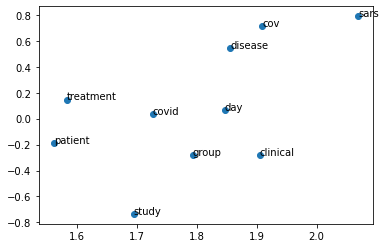

In [36]:
#words embeddings on the plot to check 2-D representation of each word
pyplot.scatter(result[:10, 0], result[:10, 1])
words = list(skipgram.wv.index_to_key)
for i, word in enumerate(words[:10]):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# PCA Plot - FastText

In [37]:
#same thing as above but with fasttext model
X_fast = FastText.wv[FastText.wv.index_to_key]
pca = PCA(n_components=2)
result_fast = pca.fit_transform(X_fast)

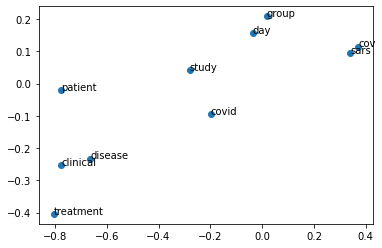

In [38]:
pyplot.scatter(result_fast[:10, 0], result_fast[:10, 1])
words = list(FastText.wv.index_to_key)
for i, word in enumerate(words[:10]):
    pyplot.annotate(word, xy=(result_fast[i, 0], result_fast[i, 1]))
pyplot.show()

# Getting Vectors for each abstract


In [39]:
vector_size=100   #defining vector size for each word

### Method 1

In [46]:
word_tokenize(df['Abstract'][0])

['aim',
 'determine',
 'coronavirus',
 'anxiety',
 'level',
 'emotional',
 'eating',
 'status',
 'case',
 'diagnosis',
 'mets',
 'according',
 'diagnostic',
 'criterion',
 'published',
 'international',
 'diabetic',
 'federation',
 'idf',
 'healthy',
 'individual',
 'similar',
 'bmi',
 'mets',
 'subject',
 'detailed',
 'description',
 'aim',
 'determine',
 'coronavirus',
 'anxiety',
 'level',
 'emotional',
 'eating',
 'status',
 'case',
 'diagnosis',
 'mets',
 'according',
 'diagnostic',
 'criterion',
 'published',
 'international',
 'diabetic',
 'federation',
 'idf',
 'healthy',
 'individual',
 'similar',
 'bmi',
 'mets',
 'subject',
 'study',
 'completed',
 'descriptive',
 'cross',
 'sectional',
 'relational',
 'screening',
 'model',
 'full',
 'sampling',
 'method',
 'used',
 'study',
 'study',
 'completed',
 'individual',
 'metabolic',
 'syndrome',
 'attending',
 'diet',
 'clinic',
 'healthy',
 'individual',
 'without',
 'mets',
 'diagnosis',
 'also',
 'attending',
 'diet',
 'clinic

In [47]:
#function to take average of all vectors of each word in abstract, so that each abstract can represent (1,100) dimensional vector

K1=[]      #creating list to store vector representation of each abstract

for i in range(df.shape[0]):       #iterating through all abstract
    K=np.zeros([vector_size,1])    #creating empty array of size (vec_size,1) to add vector representation of each word
    count=0                        #creating count to check how many words are used from abstract
    
    for word in word_tokenize(df['Abstract'][i]):   #iterating through all words in given abstract

        if word in list(FastText.wv.index_to_key):      #if word exists in vocab , increase count by 1 and add array of given words in our defined array K

            count+=1
            K+=FastText.wv[word].reshape(vector_size,1)
    K=K/count                                        #taking average of given array
    K1.append(list(K))                               #appending vector of given abstract to the initial defined list
K1_array=np.array(K1)
K1_array=K1_array.reshape(df.shape[0],vector_size)   #converting into array of shape(no. of rows, vector_size)

KeyboardInterrupt: 

In [48]:
# Method 1 will take time to run. Method 2 is prefered. 

### Method 2

In [49]:
def get_mean_vector(word2vec_model, words):
    # remove out-of-vocabulary words
    words = [word for word in tokenize(words) if word in list(word2vec_model.wv.index_to_key)] #if word is in vocab 
    if len(words) >= 1:
        return np.mean(word2vec_model.wv[words], axis=0)
    else:
        return np.array([0]*100)


### Abstract to vectors using skipgram Model

In [50]:
K1=[]                                     #defining empty list
for i in df.Abstract:
    K1.append(list(get_mean_vector(skipgram, i)))     #appending array to the list
    
    
K11=pd.DataFrame(K1).transpose()    # Saving vectors of each abstract in data frame so that we can use directly while running code again
K11.to_csv('skipgram-vec.csv')

In [51]:
K=pd.read_csv('skipgram-vec.csv')   #Loading our pretrained vectors of each abstract

skipgram_vectors=[]                          #transforming dataframe into required array like structure as we did in above step
for i in range(df.shape[0]):
    skipgram_vectors.append(K[str(i)].values)
 

### For converting Title into vectors using skipgram

In [52]:
K1_title=[]
for i in df.Title:         #instead of abstract use title
    K1_title.append(list(get_mean_vector(skipgram, i)))    

    
K1_title=pd.DataFrame(K1).transpose()    # Saving vectors of each tilte in data frame so that we can use directly while running code again
K1_title.to_csv('skipgram-vec-title.csv')    

In [53]:
K=pd.read_csv('skipgram-vec-title.csv')   #Loading our pretrained vectors of each title

K2_title=[]                          #transforming dataframe into required array like structure as we did in above step
for i in range(df.shape[0]):
    K2_title.append(K[str(i)].values)

### Abstract to vector using FastText 

In [54]:
K_fast=[]                                     #defining empty list
for i in df.Abstract:
    K_fast.append(list(get_mean_vector(FastText, i)))     #appending array to the list
    
K11=pd.DataFrame(K_fast).transpose()    # Saving vectors of each abstract in data frame so that we can use directly while running code again
K11.to_csv('FastText-vec.csv')

In [55]:
data=pd.read_csv('FastText-vec.csv')   #Loading our pretrained vectors of each abstract

fast_vectors=[]                          #transforming dataframe into required array like structure as we did in above step
for i in range(df.shape[0]):
    fast_vectors.append(data[str(i)].values)

# Cosine similarity function

In [56]:
#defining function to define cosine similarity

from numpy import dot
from numpy.linalg import norm

def cos_sim(a,b):

    return dot(a, b)/(norm(a)*norm(b)) 

# Input query Preprocessing

In [57]:
#Preprocessing input, because input should be in same form as training data set


def preprocessing_input(query,word2vec_model):
    query=preprocessing(query)
    query=query.replace('\n',' ')
    K=get_mean_vector(word2vec_model,query)
   
        
    return K   

# Function to return 'n' similar results

In [58]:
pd.set_option("display.max_colwidth", -1)       #this function will display full text from each column

/home/c0d3b23ak32/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



In [59]:
#function to return top n similar results

#query - input query
# p - average vectors for all abs
#df1 - original

def top_n(query,p,df1,model):    
    print(query)
    
    query=preprocessing_input(query,model)    #preprocessing input to list of vectors
                                    
    x=[]
    #Converting cosine similarities of overall data set with input queries into LIST
    for i in range(len(p)):
        x.append(cos_sim(query,p[i]))
    
    
 #store list in tmp to retrieve index
    tmp=list(x)
    
 #sort list so that largest elements are on the far right
    
    res = sorted(range(len(x)), key = lambda sub: x[sub])[-5:]
    sim=[tmp[i] for i in reversed(res)]
    print(sim)
 #get index of the 10 or n largest element
    L=[]
    for i in reversed(res):
    
        L.append(i)
    return df1.iloc[L, [1,2,5,6]],sim     #returning dataframe (only id,title,abstract ,publication date)

In [60]:
#kidney
#breathing
#lung failure

## Result Evaluation

In [61]:
# skipgram model

#Input your search query here

Query = "lung failure"

Results,sim = top_n(Query,skipgram_vectors,df1,skipgram)
Results

lung failure
[0.8083507786914107, 0.8024385445460107, 0.7965099705091315, 0.7927278139774155, 0.7839382252046238]


,Trial ID,Title,Abstract,Publication date
548,2021-000988-68,Immune response after covid-19 vaccination in patients with renal failure stadium 4 or 5 .,Renal failure stage 4 and 5.,2021-03-31
4235,NCT04597853,"Assessment of Lung Mechanics in SARS-CoV-2/ COVID-19 Acute Respiratory Distress Syndrome: A Holistic, Longitudinal Analysis of the Lung-heart-ventilator Interaction","This study is meant to assess the lung mechanics in SARS-CoV-2 induced acute respiratory failure. A precise characterisation of lung mechanics and heart-lung-interactions might allow a better understanding of SARS-CoV-2 induced acute respiratory failure and thus lead to better mechanical ventilation strategies. This monocentric, observational study of critically ill COVID-19 patients in the ICU, will employ impedance tomography, right-heart catheterization, oesophageal pressure measurements, indirect calorimetry as well as classic mechanical ventilation parameters to characterise the mechanical characteristics of the lung as well as the heart-lung interactions in SARS-CoV-2 induced acute respiratory failure.",2021-03-01
7831,2020-001807-18,"A Phase 2, Randomized, Double-Blind, Placebo-Controlled, Parallel-group, Multi-center Study of an Inhaled Pan-Janus Kinase Inhibitor, TD-0903, to Treat Symptomatic Acute Lung Injury Associated with COVID-19",Acute lung injury associated with COVID-19,2020-10-13
9785,2020-001236-10,"COUNTER-COVID - Oral imatinib to prevent pulmonary vascular leak in Covid19 a randomized, double --blind, placebo controlled, clinical trial in patients with severe Covid19 disease","Covid19 is characterized by hypoxemic respiratory failure, caused by extensive vascular leak and pulmonary edema early in the course of disease.",2020-12-10
4765,NCT04549636,Prospective Longitudinal Study to Characterize and Understand the Clinical Relevance of SARS-CoV2 Related Ventilation and Perfusion Injury Evaluated by V/Q SPECT-CT in an Asthmatic and Healthy Population,"Little is currently known about the immediate and long-term effect of COVID-19 on lung ventilation (delivery of air to the lungs) and lung perfusion (delivery of blood to the lungs). Some people who survive COVID-19 may have lung ventilation and/or perfusion injury that persists following COVID-19 recovery. This lung injury may be related to inflammation in the lung, breathlessness, exercise limitation and reduced quality of life. Therefore, towards the goal of understanding the effects of COVID-19 on lung health, the purpose of this study is to characterize and understand the clinical relevance of COVID-19 related lung ventilation and perfusion injury and associated inflammatory status, ≤4 weeks and 6-months following COVID-19 recovery in an asthmatic and healthy population. To do this, an asthmatic and healthy population who have, and have not, been previously diagnosed with COVID-19 will be studied.",2020-09-18


In [62]:
# fasttext model

#Input your search query here

Query = "lung failure"

Results,sim=top_n(Query,fast_vectors,df1,FastText)
Results

lung failure
[0.8478911258515825, 0.825774523640895, 0.818642390838548, 0.8147454801956594, 0.8130856143456636]


,Trial ID,Title,Abstract,Publication date
7831,2020-001807-18,"A Phase 2, Randomized, Double-Blind, Placebo-Controlled, Parallel-group, Multi-center Study of an Inhaled Pan-Janus Kinase Inhibitor, TD-0903, to Treat Symptomatic Acute Lung Injury Associated with COVID-19",Acute lung injury associated with COVID-19,2020-10-13
548,2021-000988-68,Immune response after covid-19 vaccination in patients with renal failure stadium 4 or 5 .,Renal failure stage 4 and 5.,2021-03-31
5933,2020-001794-77,Phase II Clinical Trial to evaluate the efficacy of silibinin supplementation in the prevention of the progression of the respiratory failure in patients with onco-hematological diseases and infection by COVID-19 positive.,COVID19 respiratory failure,2020-06-08
8093,2020-001203-16,"Lipid ibuprofen versus standard of care for acute hypoxaemic respiratory failure due to COVID-19: a multicentre, randomised, controlled trial",COVID-19 respiratory failure hypoxaemia.,2020-05-06
6517,2020-001795-15,"A randomized, double blind, placebo-COntrolled trial of MavrilimumaB for Acute respiratory failure due To COVID-19 pneumonia with hyperinflammation: the COMBAT-19 trial",Respiratory failure during COVID-19 pneumonia and hyperinflammation,2020-05-07


# Streamlit App (Refer Medical.py file to run the app)

In [63]:
#streamlit function 
def main():
    # Load data and models
    data = df1     #our data which we have to display
    model = top_n  #top_n model to return n similar results
    

    st.title("Medical Search engine")      #title of our app
    st.write('Type your query here')       #text below title

    # User search
    user_input = st.text_input("Search box")   #getting input from user

   
    # Fetch results
    if user_input:
        
        P,sim =model(str(user_input),K2,data)     #storing our output dataframe in P
        #Plotly function to display our dataframe in form of plotly table
        fig = go.Figure(data=[go.Table(header=dict(values=['ID', 'Title','Abstract','Publication Date','Similarity']),cells=dict(values=[list(P['Trial ID'].values),list(P['Title'].values), list(P['Abstract'].values),list(P['Publication date'].values),list(np.around(sim,4))],align='center'))])
        #displying our plotly table
        fig.update_layout(height=1700) 
        st.plotly_chart(fig) 
        # Get individual results
    

if __name__ == "__main__":
    main()

2023-01-06 01:19:58.508 
  command:

    streamlit run /home/c0d3b23ak32/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [66]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
